In [31]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt
# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(
num_words=1000)
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)



In [24]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)


Epoch 1/20
49/49 - 1s - loss: 0.5584 - accuracy: 0.7251 - val_loss: 0.4178 - val_accuracy: 0.8249 - 534ms/epoch - 11ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3626 - accuracy: 0.8480 - val_loss: 0.3466 - val_accuracy: 0.8544 - 191ms/epoch - 4ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3214 - accuracy: 0.8663 - val_loss: 0.3308 - val_accuracy: 0.8597 - 169ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3079 - accuracy: 0.8736 - val_loss: 0.3275 - val_accuracy: 0.8608 - 202ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3051 - accuracy: 0.8730 - val_loss: 0.3289 - val_accuracy: 0.8596 - 197ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2983 - accuracy: 0.8768 - val_loss: 0.3274 - val_accuracy: 0.8599 - 185ms/epoch - 4ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2957 - accuracy: 0.8777 - val_loss: 0.3291 - val_accuracy: 0.8588 - 181ms/epoch - 4ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2908 - accuracy: 0.8795 - val_loss: 0.3309 - val_accuracy: 0.8592 - 184ms/epoch - 4ms/step
Epoch 9/20
49/4

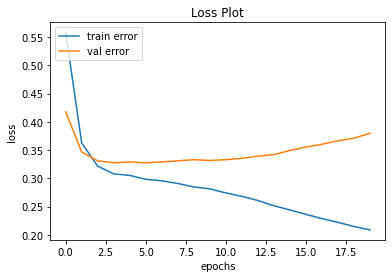

In [25]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [33]:
#과잉 적합 규제 적용

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


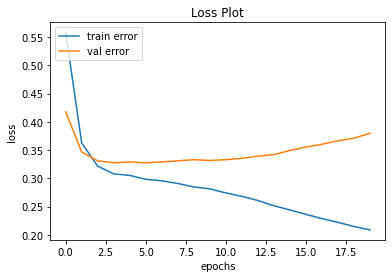

In [27]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [28]:
# Dropout

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


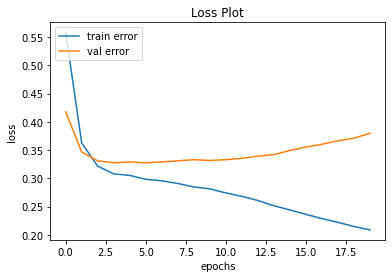

In [29]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test /255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2197 - accuracy: 0.9345
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0963 - accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0694 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9832
Epoch 5/5
313/313 [==============================] - 0s 709us/step - loss: 0.0601 - accuracy: 0.9805


[0.060067784041166306, 0.9804999828338623]

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# 픽셀 값을 0~1 사이로 정규화한다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1420 - accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0207 - accuracy: 0.9936
